# Define metrics

In [1]:
from model import PathFindingModel
import mesa

In [2]:
params = {"width":20,"height":20,"obs_num":40,"goals_num":2}
results = mesa.batch_run(
    PathFindingModel,
    parameters = params,
    iterations = 100,
    max_steps = 200,
    number_processes = 1,
    data_collection_period = 5,
    display_progress=True
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [19:13<00:00, 11.53s/it]


In [3]:
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.keys())

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'obs_num', 'goals_num',
       'Goal_Rank', 'Benchmark_Rank'],
      dtype='object')


In [4]:
results_df.head()

,RunId,iteration,Step,width,height,obs_num,goals_num,Goal_Rank,Benchmark_Rank
0,0,0,0,20,20,40,2,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5]"
1,0,0,5,20,20,40,2,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5]"
2,0,0,10,20,20,40,2,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5]"
3,0,0,15,20,20,40,2,"[4, 3, 5, 2, 0, 1]","[4, 3, 5, 2, 0, 1]"
4,0,0,20,20,20,40,2,"[0, 2, 1, 3, 4, 5]","[0, 2, 1, 3, 4, 5]"


### Stability: the frequency of ranking change 

In [5]:
def stability(rankings_list):
    ## the rankings should be ordered based on time
    num = 0
    current_ranking = []
    for ranking in rankings_list:
        if ranking!=current_ranking:
            num +=1
            current_ranking = ranking
    return 1/num

In [6]:
prediction_stability = results_df.groupby("iteration")["Goal_Rank"].agg(stability)
benchmark_stability = results_df.groupby("iteration")["Benchmark_Rank"].agg(stability)

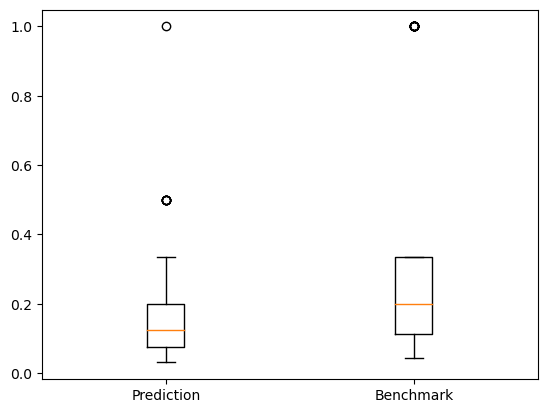

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = [prediction_stability, benchmark_stability]
fig,ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2],['Prediction', 'Benchmark'])
plt.show()

### Correctness: the proportion of time get the top ranked goal correct

In [8]:
def correctness(rankings_list):
    num = 0
    for ranking in rankings_list:
        if ranking[0]==0:
            num += 1
    return num/rankings_list.size

In [9]:
prediction_correctness = results_df.groupby("iteration")["Goal_Rank"].agg(correctness)
benchmark_correctness = results_df.groupby("iteration")["Benchmark_Rank"].agg(correctness)

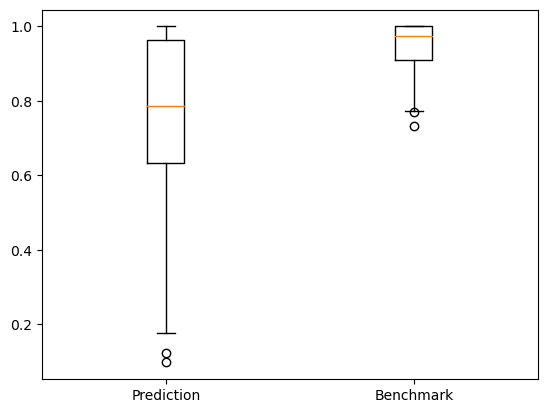

In [10]:
columns = [prediction_correctness, benchmark_correctness]
fig,ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2],['Prediction', 'Benchmark'])
plt.show()